# UFCFVQ-15-M Programming for Data Science (Autumn 2023)

## Student Id: 

# Programming Task 2

### Requirement FR6 - Read CSV data from two files and merge it into a single Data Frame 

In [24]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as snsS
from scipy.stats import f_oneway
plt.style.use('ggplot')

In [25]:
# Read the CSV files into DataFrames
df1 = pd.read_csv('task2a.csv')
df2 = pd.read_csv('task2b.csv')

# Ensure that the indices match up
assert df1.shape[0] == df2.shape[0]
# Ensure that duplicate fields matchup
assert df1[['Entity', 'Year']].equals(df2[['Entity', 'Year']])

# # Concatenate the DataFrames
df = pd.concat([df1, df2], axis=1)

df3 = df.T.drop_duplicates().T

df3

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.82974,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.09619,1.70532,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.66926
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,0.15567,0.607993,0.117248,3.090168,3.128192,0.76628,1.515641
6464,Zimbabwe,2014,0.155993,0.60861,0.118073,3.093964,3.14029,0.768914,1.51547
6465,Zimbabwe,2015,0.156465,0.609363,0.11947,3.098687,3.15571,0.771802,1.514751
6466,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,3.174134,0.772275,1.513269


### Requirement FR7 - Explore the dataset to identify an "interesting" pattern or trend

In [26]:
# shape of merged dataframe
df3.shape

(6468, 9)

In [27]:
df3.head(20)

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.82974,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.09619,1.70532,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.66926
5,Afghanistan,1995,0.160076,0.698695,0.09098,4.828337,4.104207,1.728112,0.668746
6,Afghanistan,1996,0.160249,0.698914,0.089709,4.828083,4.1075,1.737643,0.667727
7,Afghanistan,1997,0.160554,0.699127,0.088372,4.827726,4.110834,1.746891,0.66622
8,Afghanistan,1998,0.160931,0.699372,0.08733,4.826971,4.114438,1.756963,0.664676
9,Afghanistan,1999,0.161311,0.699674,0.086267,4.826413,4.117633,1.770791,0.663428


In [28]:
df3.info()
# Dataframe info
# This is showing that their are no null or missing values in the dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Entity                     6468 non-null   object
 1   Year                       6468 non-null   object
 2   Schizophrenia (%)          6468 non-null   object
 3   Bipolar disorder (%)       6468 non-null   object
 4   Eating disorders (%)       6468 non-null   object
 5   Anxiety disorders (%)      6468 non-null   object
 6   Depression (%)             6468 non-null   object
 7   Drug use disorders (%)     6468 non-null   object
 8   Alcohol use disorders (%)  6468 non-null   object
dtypes: object(9)
memory usage: 454.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Entity                    

In [29]:
# Checking to see if there are any missing values
# the dataframe has no missing values
df3.isna().sum()

Entity                       0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Depression (%)               0
Drug use disorders (%)       0
Alcohol use disorders (%)    0
dtype: int64

In [30]:
df3.dtypes

Entity                       object
Year                         object
Schizophrenia (%)            object
Bipolar disorder (%)         object
Eating disorders (%)         object
Anxiety disorders (%)        object
Depression (%)               object
Drug use disorders (%)       object
Alcohol use disorders (%)    object
dtype: object

In [31]:

# df3[['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
#        'Eating disorders (%)', 'Anxiety disorders (%)', 'Depression (%)',
#        'Drug use disorders (%)', 'Alcohol use disorders (%)']].describe()
df3.describe()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Drug use disorders (%),Alcohol use disorders (%)
count,6468,6468,6468.00000,6468.000000,6468.000000,6468.00000,6468.000000,6468.000000,6468.000000
unique,231,28,6468.00000,6468.000000,6468.000000,6468.00000,6468.000000,6468.000000,6468.000000
top,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
freq,28,231,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [32]:
df3 = df3.rename(columns={'Schizophrenia (%)': 'Schizophrenia', 'Bipolar disorder (%)': 'Bipolar_Disorder',
       'Eating disorders (%)': 'Eating_Disorders', 'Anxiety disorders (%)': 'Anxiety_Disorders', 'Depression (%)': 'Depression',
       'Drug use disorders (%)': 'Drug_Use_Disorders', 'Alcohol use disorders (%)':'Alcohol_Use_Disorders'})
df3

,Entity,Year,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.82974,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.09619,1.70532,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.66926
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,0.15567,0.607993,0.117248,3.090168,3.128192,0.76628,1.515641
6464,Zimbabwe,2014,0.155993,0.60861,0.118073,3.093964,3.14029,0.768914,1.51547
6465,Zimbabwe,2015,0.156465,0.609363,0.11947,3.098687,3.15571,0.771802,1.514751
6466,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,3.174134,0.772275,1.513269


In [33]:
# not duplicated rows by column
# df3.loc[~df3.duplicated(subset=['Entity'])]

# select subset of dataframe rows by entity value
df_afgh = df3[df3['Entity'] == 'Afghanistan'].copy()
df_afgh

,Entity,Year,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.82883,4.071831,1.677082,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.82974,4.079531,1.684746,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,4.088358,1.694334,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,4.09619,1.70532,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,4.099582,1.716069,0.66926
5,Afghanistan,1995,0.160076,0.698695,0.09098,4.828337,4.104207,1.728112,0.668746
6,Afghanistan,1996,0.160249,0.698914,0.089709,4.828083,4.1075,1.737643,0.667727
7,Afghanistan,1997,0.160554,0.699127,0.088372,4.827726,4.110834,1.746891,0.66622
8,Afghanistan,1998,0.160931,0.699372,0.08733,4.826971,4.114438,1.756963,0.664676
9,Afghanistan,1999,0.161311,0.699674,0.086267,4.826413,4.117633,1.770791,0.663428


In [34]:
df_afgh.isna().sum()

Entity                   0
Year                     0
Schizophrenia            0
Bipolar_Disorder         0
Eating_Disorders         0
Anxiety_Disorders        0
Depression               0
Drug_Use_Disorders       0
Alcohol_Use_Disorders    0
dtype: int64

In [35]:
### Temporal Analysis

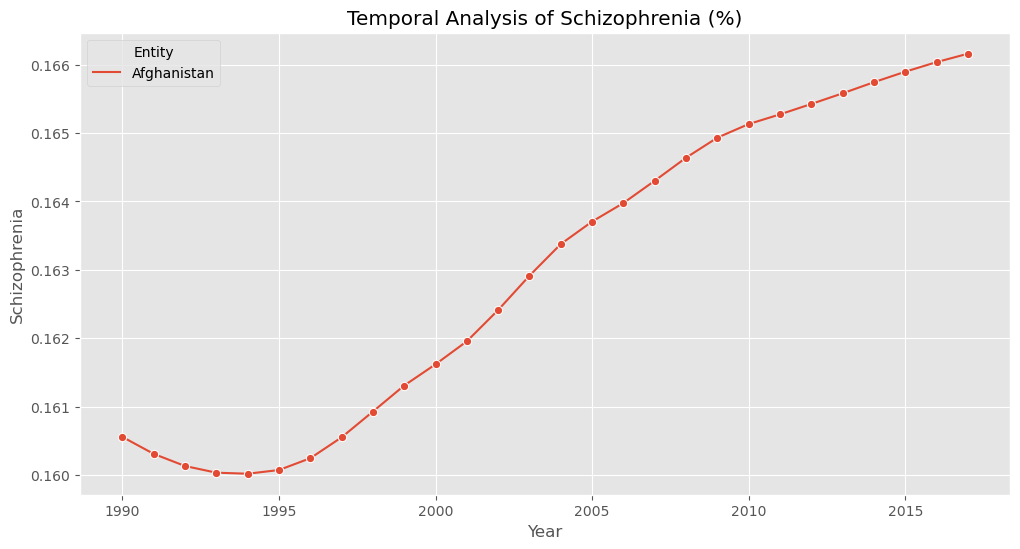

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Schizophrenia', hue='Entity', data=df_afgh, marker='o')
plt.title('Temporal Analysis of Schizophrenia (%)')
plt.show()

In [37]:
df_afgh.loc[df_afgh.duplicated()]

,Entity,Year,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders


In [38]:
df_afgh['Schizophrenia'].value_counts()

Schizophrenia
0.160559542    1
0.160311899    1
0.166035374    1
0.165895095    1
0.165741957    1
0.165579372    1
0.165423787    1
0.165271894    1
0.165130259    1
0.164931668    1
0.164638794    1
0.164302469    1
0.163976912    1
0.163706038    1
0.163377394    1
0.16291564     1
0.162414146    1
0.161957171    1
0.161621224    1
0.161310885    1
0.160930712    1
0.160553947    1
0.160248726    1
0.160076309    1
0.160022297    1
0.160037391    1
0.160134822    1
0.166157852    1
Name: count, dtype: int64

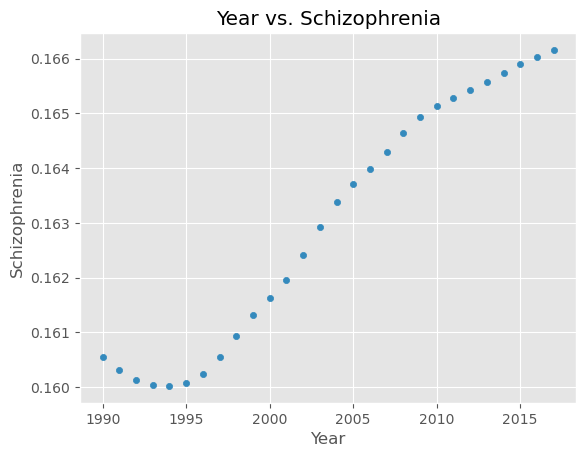

In [39]:
df_afgh.plot(kind='scatter',
             x='Year',
             y='Schizophrenia',
             title='Year vs. Schizophrenia')
plt.show()

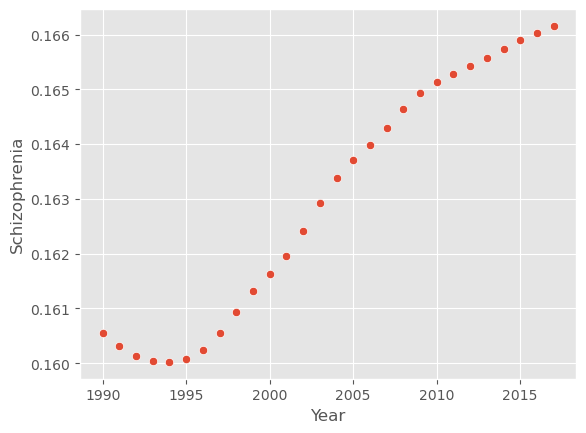

In [40]:
sns.scatterplot(x='Year',
                y='Schizophrenia',
                data=df_afgh)
plt.show()

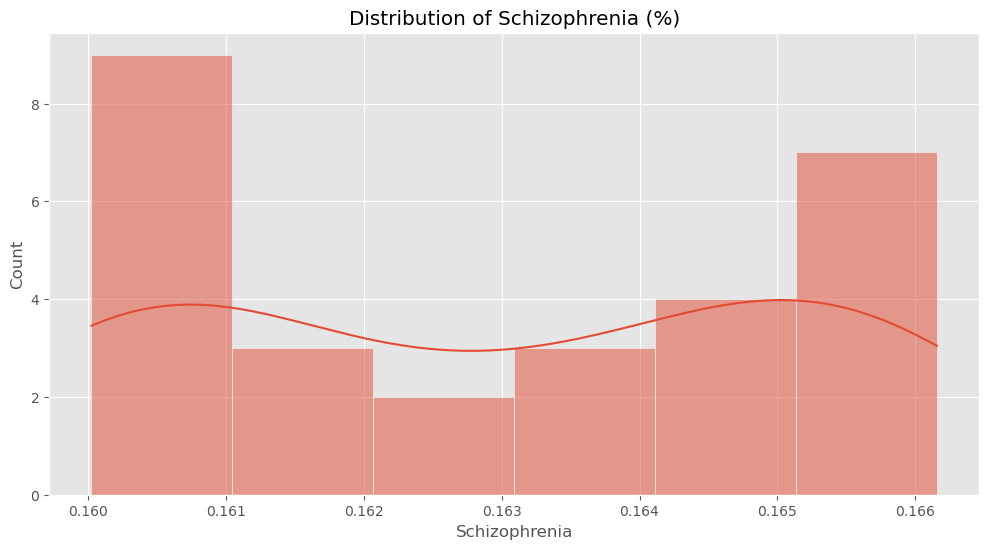

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df_afgh['Schizophrenia'], kde=True)
plt.title('Distribution of Schizophrenia (%)')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


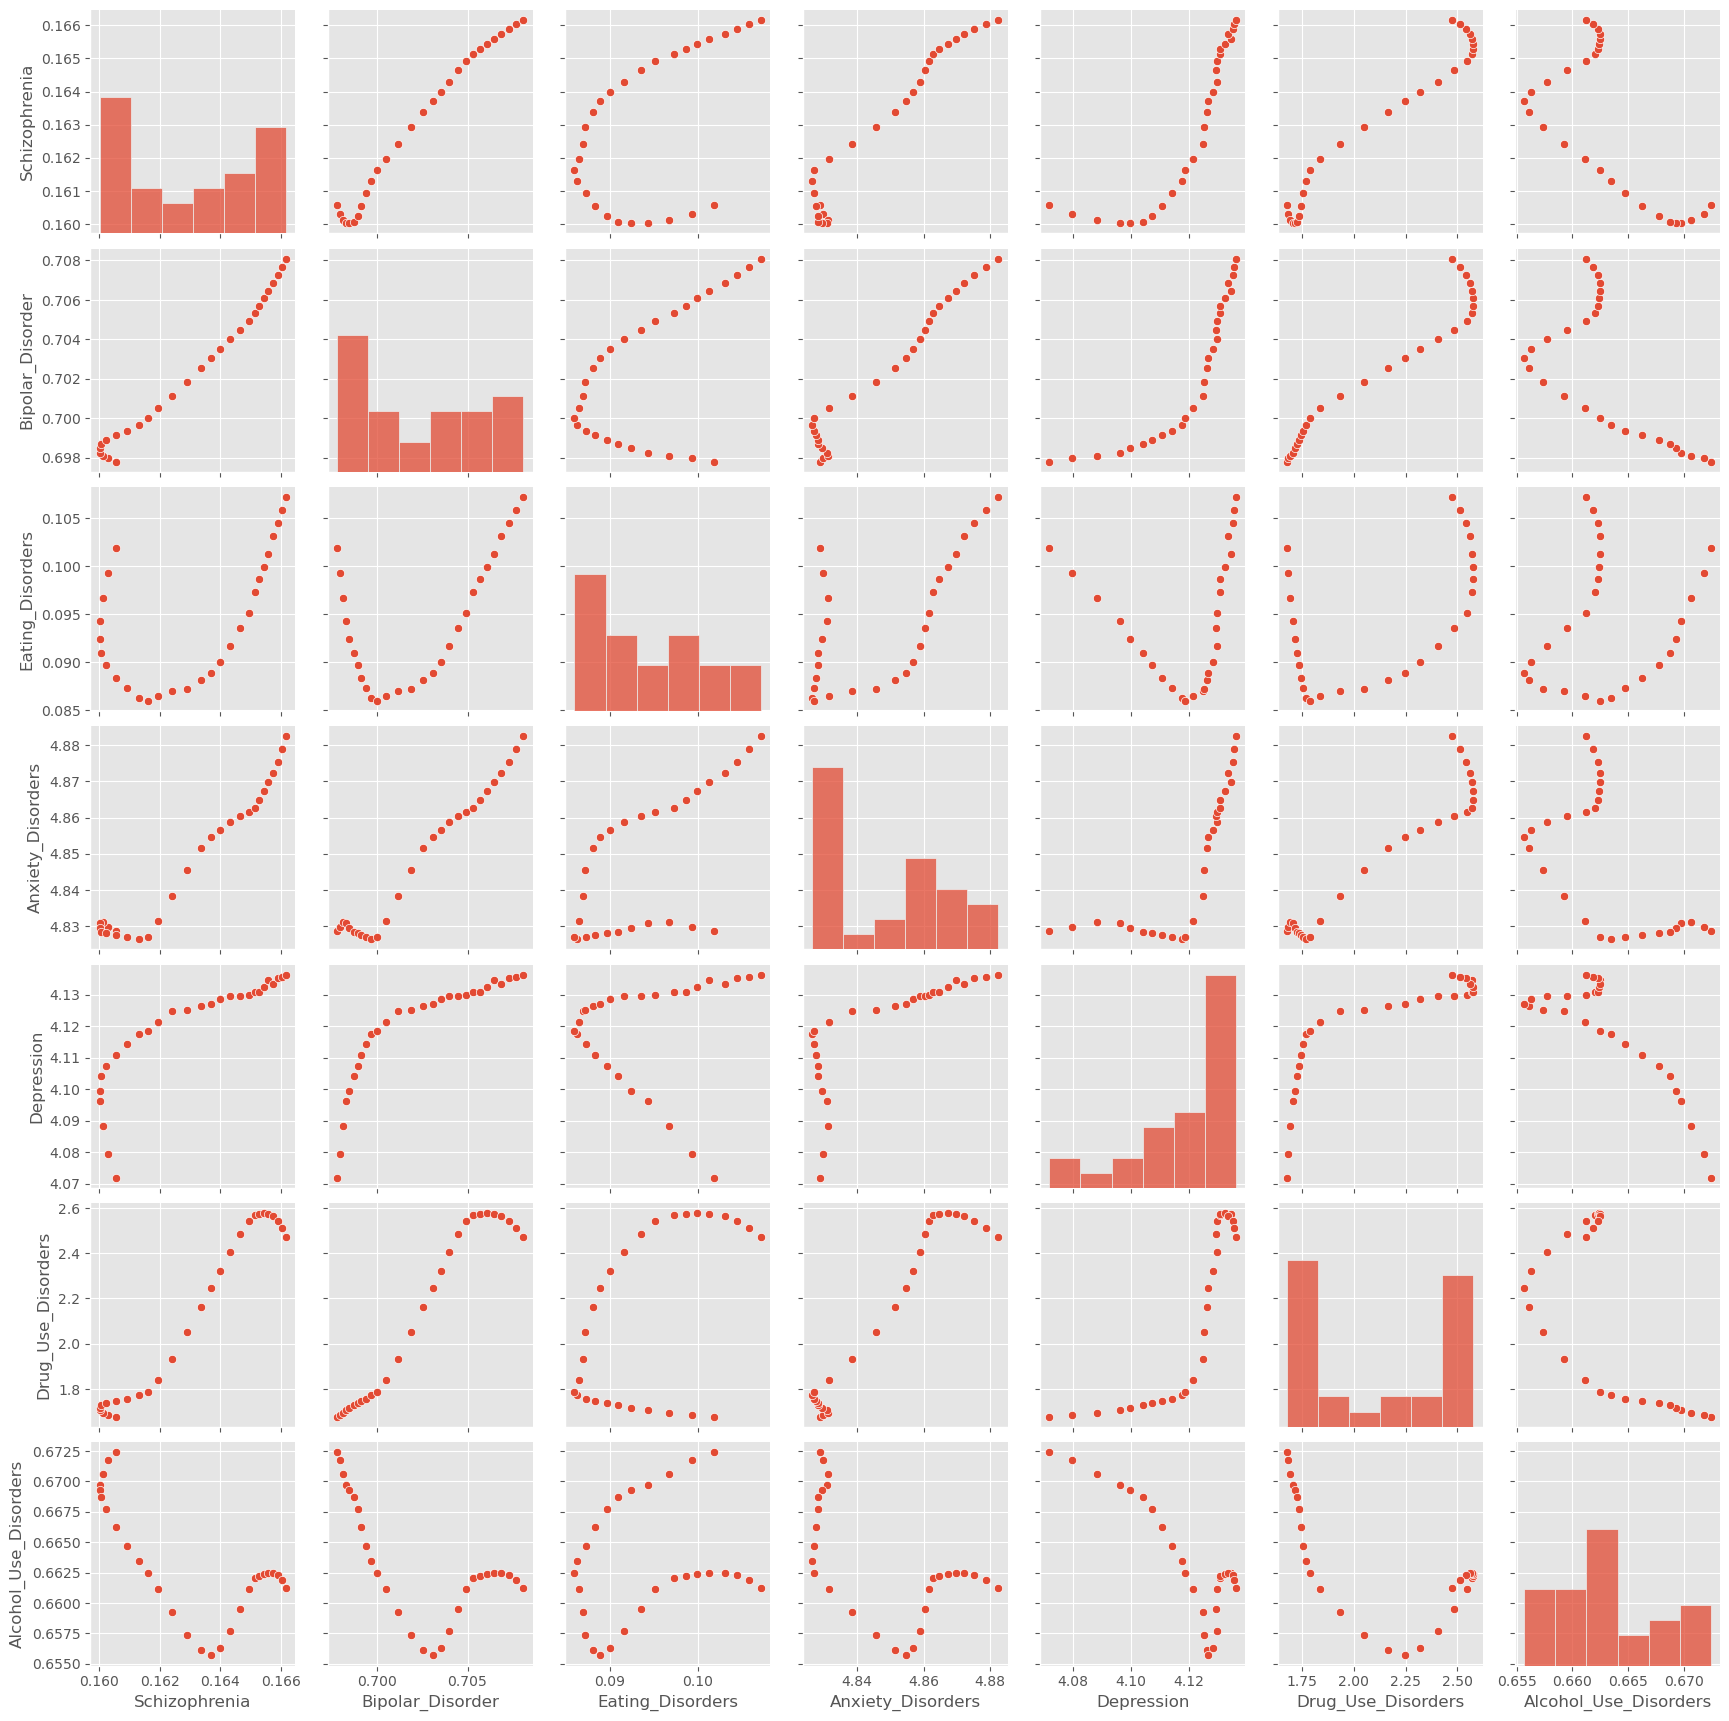

In [44]:
sns.pairplot(df_afgh, vars=['Schizophrenia','Bipolar_Disorder',
                            'Eating_Disorders','Anxiety_Disorders',
                            'Depression','Drug_Use_Disorders', 'Alcohol_Use_Disorders'])
plt.show()

In [ ]:
#corrolation analysis

In [16]:
df_afgh = df_afgh[['Schizophrenia', 'Bipolar_Disorder','Eating_Disorders', 'Anxiety_Disorders', 'Depression','Drug_Use_Disorders', 'Alcohol_Use_Disorders']].astype('float64')
df_afgh_corr = df_afgh.corr()
df_afgh_corr

,Schizophrenia,Bipolar_Disorder,Eating_Disorders,Anxiety_Disorders,Depression,Drug_Use_Disorders,Alcohol_Use_Disorders
Schizophrenia,1.000000,0.990938,0.542414,0.970837,0.852509,0.978881,-0.657815
Bipolar_Disorder,0.990938,1.000000,0.580787,0.980717,0.858151,0.968958,-0.612064
Eating_Disorders,0.542414,0.580787,1.000000,0.667701,0.102705,0.532062,0.228456
Anxiety_Disorders,0.970837,0.980717,0.667701,1.000000,0.768434,0.960289,-0.548154
Depression,0.852509,0.858151,0.102705,0.768434,1.000000,0.822947,-0.839577
Drug_Use_Disorders,0.978881,0.968958,0.532062,0.960289,0.822947,1.000000,-0.617757
Alcohol_Use_Disorders,-0.657815,-0.612064,0.228456,-0.548154,-0.839577,-0.617757,1.000000


<Axes: >

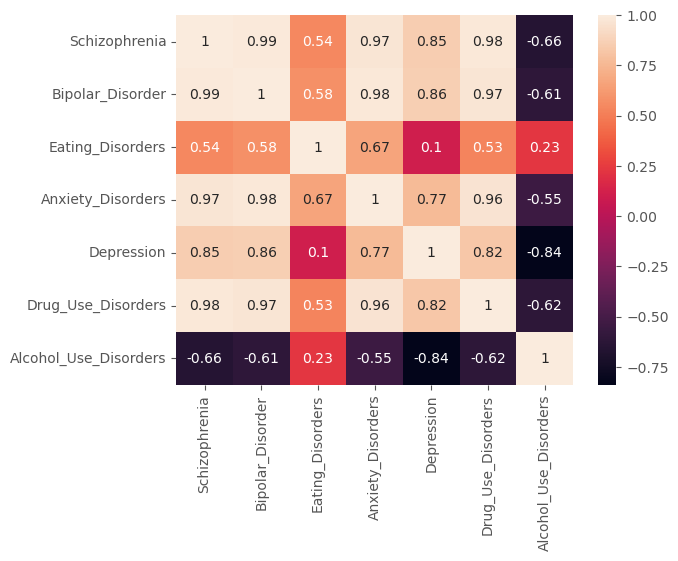

In [17]:
sns.heatmap(df_afgh_corr, annot=True)

In [ ]:
### Visualize mean depression prevalence by entity

In [19]:
# Select a few entities for analysis
selected_entities = ['Afghanistan', 'Albania', 'Algeria']

# Filter the data for selected entities
df_selection = df3[df3['Entity'].isin(selected_entities)]

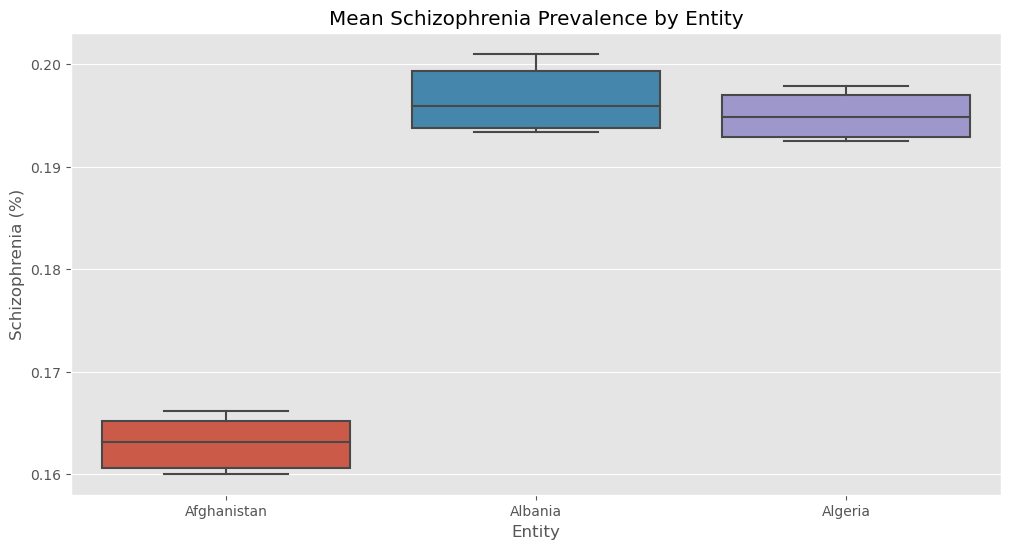

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Entity', y='Schizophrenia', data=df_selection)
plt.title('Mean Schizophrenia Prevalence by Entity')
plt.xlabel('Entity')
plt.ylabel('Schizophrenia (%)')
plt.show()

### Requirement FR8 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

In [ ]:
# replace with your code

### Requirement FR9 - Define a hypothesis to test your “interesting” pattern or trend

### Requirement FR10 - Test your hypothesis with statistical significance level of 0.05